In [ ]:
# import reader.Read_otp
from reader import Read_otp

import numpy as np

import matplotlib as mpl
import matplotlib

# matplotlib.use('agg')
# matplotlib.use('TkAgg')
# matplotlib.use('qtagg')
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.pyplot import *
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from math import *
# import pandas as pd

from scipy import interpolate
from scipy.optimize import curve_fit

from astropy.io import fits
from astropy.table import Table
from astropy.table import vstack
from astropy.coordinates import SkyCoord, ICRS, Galactic

# import astropy.units as u
import astropy.units as units
import astropy.coordinates as coord
# from matplotlib.colors import LogNorm

# from mpl_toolkits.axes_grid1 import make_axes_locatable
# #import matplotlib.ticker as mtick


import os

# %matplotlib widget
import seaborn as sns
import os, sys


# from astropy.io import ascii
# from astropy.coordinates import galactocentric_frame_defaults

import sklearn
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

from scipy import interpolate

import random
from scipy import integrate


gcolor = ["c", "blue", "g", "r", "orange", "green", "cyan"]


import ppxf as ppxf_package
from ppxf.ppxf import ppxf
import ppxf.ppxf_util as util
import ppxf.sps_util as lib
import sys, glob
from pathlib import Path

from ppxf.ppxf import ppxf, robust_sigma

from tqdm import tqdm

In [40]:
def TB_reindex(TB_now):
    TB_now = TB_now.reset_index()
    TB_now = TB_now.drop(columns='index')
    return TB_now

In [41]:
import numpy as np

def Data_Grouping(array_x, array_y, group_k):
    """
    Group data from two arrays and calculate median and standard deviation for each group.
    Ignores data points where either x or y contains NaN.
    
    Parameters:
    -----------
    array_x : array-like
        First input array
    array_y : array-like
        Second input array
    group_k : int
        Number of elements per group
        
    Returns:
    --------
    tuple of lists
        (median_x, median_y, std_x, std_y) for each group
    """
    # Input validation
    if len(array_x) != len(array_y):
        raise ValueError("Input arrays must have the same length")
    if group_k <= 0:
        raise ValueError("Group size must be a positive integer")
    
    # Convert inputs to numpy arrays for more efficient operations
    array_x = np.array(array_x, dtype=float)
    array_y = np.array(array_y, dtype=float)
    
    # Create a mask for valid (non-NaN) data points
    valid_mask = ~(np.isnan(array_x) | np.isnan(array_y))
    
    # Filter out rows with NaN values
    valid_x = array_x[valid_mask]
    valid_y = array_y[valid_mask]
    
    # Calculate number of groups
    total_len = len(valid_x)
    num_groups = (total_len + group_k - 1) // group_k  # Ceiling division
    
    # Initialize result lists
    median_x = []
    median_y = []
    std_x = []
    std_y = []
    
    # Process each group
    for i in range(num_groups):
        # Calculate start and end indices for current group
        start_idx = i * group_k
        end_idx = min(start_idx + group_k, total_len)
        
        # Extract current group data
        group_x = valid_x[start_idx:end_idx]
        group_y = valid_y[start_idx:end_idx]
        
        # Only calculate statistics if there are valid points in the group
        if len(group_x) > 0:
            median_x.append(np.median(group_x))
            median_y.append(np.median(group_y))
            
            # Use ddof=1 for sample standard deviation
            # If only 1 point is valid, use 0 for std dev or an alternative value
            std_x.append(np.std(group_x, ddof=1) if len(group_x) > 1 else 0)
            std_y.append(np.std(group_y, ddof=1) if len(group_y) > 1 else 0)
    
    return median_x, median_y, std_x, std_y

In [42]:
def Read_Galaxy(Galaxy_name):
    df_1 = Read_otp(Galaxy_name)
    df_2 = Read_otp(Galaxy_name, 'VNB')
    # df_3 = Read_otp(Galaxy_name, 'RDB')

    return df_1, df_2
# , df_3

In [43]:
df_1, df_2= Read_Galaxy("VCC1588")

In [44]:
def DF_CBer(Data_list, Name_list):
    data_new = [nan]*len(Data_list)
    for i in range(len(Data_list)):
        data_new[i] = Data_list[i].reshape(-1)
    data_new = list(zip(*data_new))
    df = pd.DataFrame(data_new)
    df.columns = Name_list
    return df

In [45]:
df_1

{'analysis_type': array('P2P', dtype='<U3'),
 'stellar_kinematics': array({'velocity_field': array([[143.34289663,   0.        , -99.92400045, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        , -74.99340312,   0.        , ...,   0.        ,
           0.        ,   0.        ],
        [  0.        ,   0.        ,  13.278277  , ..., -69.9039187 ,
         -69.9039187 , -69.9039187 ],
        ...,
        [  0.        , 166.97422476,  69.20207655, ...,   0.        ,
           0.        ,   0.        ],
        [  0.        , -70.71781067,   0.        , ..., 231.6407679 ,
         231.6407679 , 231.6407679 ],
        [  0.        ,   0.        ,   0.        , ..., 256.6052657 ,
         256.6052657 , 256.6052657 ]], shape=(23, 87)), 'dispersion_field': array([[ 20.        , 150.        ,  20.        , ..., 139.83545318,
         139.83545318, 139.83545318],
        [150.        ,  71.74460966, 150.        , ..., 150.        ,
         150.        , 150.     

In [46]:
df_1.keys()

dict_keys(['analysis_type', 'stellar_kinematics', 'global_kinematics', 'distance', 'emission', 'signal_noise', 'stellar_population', 'indices'])

In [47]:
np.sum(np.isnan(df_1['stellar_population'].item()['metallicity']))

np.int64(113)

(array([[ 9.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.],
        [10.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.],
        [15.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
        [16.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [17.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [15.,  4.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.],
        [16.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.],
        [17.,  1.,  3.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
        [14.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  2.],
        [14.,  0.,  2.,  0.,  1.,  1.,  1.,  0.,  1.,  3.],
        [15.,  1.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  4.],
        [12.,  2.,  2.,  2.,  0.,  0.,  1.,  2.,  1.,  1.],
        [19.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [16.,  4.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.],
        [17.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.],
        [15.,  2.,  1.,  1.,  1.,  0.,  0.,  1.,  0.,  2.],
        [16.,  2.,  2.,  0.,  1.,  0.,  

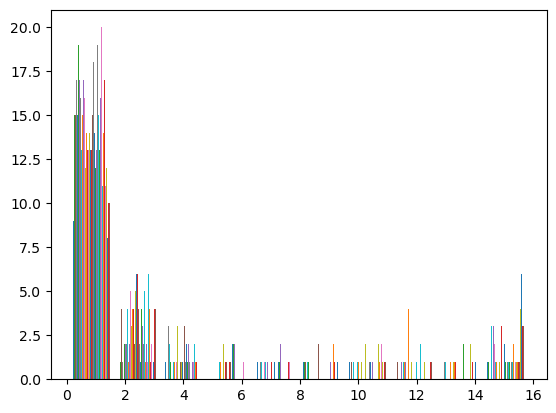

In [48]:
plt.hist(df_1['stellar_population'].item()['age'])

In [49]:
df_2.keys()

dict_keys(['analysis_type', 'stellar_kinematics', 'distance', 'binning', 'emission', 'indices', 'bin_indices'])

In [50]:
df_1['signal_noise']

array({'signal': array([[12.76343947, 10.8797311 ,  6.64876888, ...,  6.26138304,
         6.26138304,  6.26138304],
       [ 6.96567153,  4.73697142,  4.21195119, ...,  5.99007665,
         5.99007665,  5.99007665],
       [14.23270964, 10.98470683,  5.38722754, ...,  7.30092677,
         7.30092677,  7.30092677],
       ...,
       [ 3.34416107,  3.93568974,  4.27170704, ...,  9.48814561,
         9.48814561,  9.48814561],
       [ 3.81691583,  3.65243839,  4.30501415, ...,  7.54841261,
         7.54841261,  7.54841261],
       [ 3.1480503 ,  3.01752665,  2.80182791, ...,  6.68616516,
         6.68616516,  6.68616516]], shape=(23, 87)), 'noise': array([[ 7.93908845,  8.21490158, 10.35777325, ...,  9.04626266,
         9.04626266,  9.04626266],
       [ 7.73781508,  8.0559576 ,  9.11651905, ...,  6.2418104 ,
         6.2418104 ,  6.2418104 ],
       [ 6.78227631,  7.26116312,  9.1650609 , ...,  6.41126561,
         6.41126561,  6.41126561],
       ...,
       [10.2560854 ,  9.17732779

(array([ 70., 237., 227., 192., 145., 163., 106., 103., 133., 102.,  71.,
         62.,  69.,  71.,  49.,  39.,  41.,  24.,  27.,  16.,  12.,   7.,
         10.,   5.,   5.,   1.,   2.,   1.,   1.,   1.,   2.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. ]),
 <BarContainer object of 40 artists>)

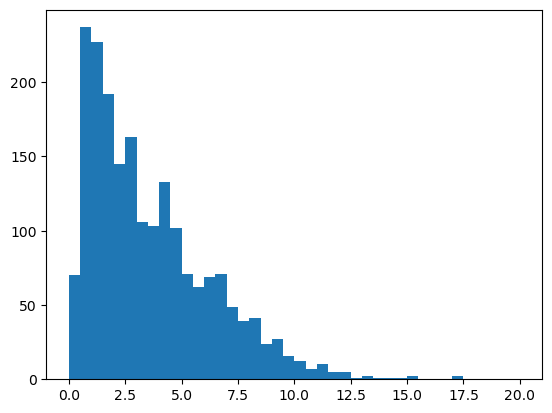

In [51]:
plt.hist(df_1['signal_noise'].item()['snr'].reshape(-1),range=(0,20),bins=40)

In [52]:
df_2['indices'].item()['bin_indices']

{'Hbeta': array([2.30724459, 3.38016612, 3.26340411, 3.41172709, 3.45865884,
        3.65865542, 2.69992292, 3.79714451, 3.155284  , 3.27281307,
        3.53848215, 3.51195511, 3.56714481, 2.55745322, 0.55533209,
        1.17916437, 2.98105632, 0.54667385, 2.52777256, 1.08741071]),
 'Fe5015': array([-0.25389744,  3.47950546,  3.66841238,  3.6463241 ,  4.80699714,
         3.32092987,  3.34320024,  4.30267778,  4.0505846 ,  3.41705757,
         3.08435462,  4.52521506,  3.69777922,  2.28679419, -1.83408807,
         2.25083926,  3.25126415,  1.09883336,  2.94206739,  2.49216879]),
 'Mgb': array([1.85862126, 2.02948753, 2.06646618, 1.52495522, 2.19154789,
        1.83906365, 2.08717514, 2.20136824, 2.01180294, 2.03609212,
        2.369865  , 2.38392131, 2.12177654, 1.6617659 , 0.14642295,
        0.27332459, 1.50696109, 0.34822239, 1.78112954, 1.46327122])}

In [53]:
D1 = DF_CBer([df_1['indices'].item()['Hbeta'],df_1['distance'].item()['field']], ['Hbeta','r'])
D2 = DF_CBer([df_2['indices'].item()['bin_indices']['Hbeta'],df_2['distance'].item()['bin_distances']], ['Hbeta','r'])
# D3 = DF_CBer([df_3['indices'].item()['Hbeta'],df_3['distance'].item()['bin_distances']], ['Hbeta','r'])

In [54]:
D2

,Hbeta,r
0,2.307245,21.365492
1,3.380166,15.426336
2,3.263404,10.688548
3,3.411727,14.634151
4,3.458659,2.966528
5,3.658655,9.531831
6,2.699923,25.456401
7,3.797145,2.711687
8,3.155284,10.854248
9,3.272813,9.599767


In [55]:
# plt.plot(Test['r'], Test['Hbeta'], '.')

In [56]:
# # fig, ax = plt(1, 1, facecolor='white', figsize=(6,4), dpi=300, tight_layout=True)
# plt.figsize=(6,4)
# gs1 = gridspec.GridSpec(1, 1)
# gs1.update(left=0.05, right=.95, bottom=0.05, top=0.95, hspace=0.05)
# ax1 = plt.subplot(gs1[0])

# ax1.plot(D1['r'], D1['Hbeta'], 'o', c='tab:gray', ms=2, mew=1, alpha=.3, label='P2P Solution', zorder=0)
# ax1.plot(D2['r'], D2['Hbeta'], '+', c='tab:red', ms=7, mew=2, alpha=.7, label='VNB Solution')
# # ax1.plot(D3['r'], D3['Hbeta'], 'x', c='tab:green', ms=7, mew=2, alpha=.7, label='RDB Solution')

# Galaxy_P2P_GP = Data_Grouping(array_x=np.array(D1.sort_values(by=['r'])['r']), array_y=np.array(D1.sort_values(by=['r'])['Hbeta']), group_k=70)
# Galaxy_VNB_GP = Data_Grouping(array_x=np.array(D2.sort_values(by=['r'])['r']), array_y=np.array(D2.sort_values(by=['r'])['Hbeta']), group_k=3)
# # Galaxy_RDB_GP = Data_Grouping(array_x=np.array(D3.sort_values(by=['r'])['r']), array_y=np.array(D3.sort_values(by=['r'])['Hbeta']), group_k=3)

# ax1.errorbar(Galaxy_P2P_GP[0], Galaxy_P2P_GP[1], yerr=Galaxy_P2P_GP[3],color='tab:gray',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7, zorder=1)
# ax1.errorbar(Galaxy_VNB_GP[0], Galaxy_VNB_GP[1], yerr=Galaxy_VNB_GP[3],color='tab:red',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7)
# # ax1.errorbar(Galaxy_RDB_GP[0], Galaxy_RDB_GP[1], yerr=Galaxy_RDB_GP[3],color='tab:green',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7, zorder=1)

# ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
# ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
# ax1.tick_params(axis='both', which='both', labelsize='x-small', right=True, top=True, direction='in')

# ax1.set_ylim(0,8)
# # ax1.set_xlim(,)
# # ax1.set_yscale('log')
# ax1.set_xlabel(r'R', size=11)
# ax1.set_ylabel(r'H beta', size=11)

# ax1.legend()

# # plt.savefig('./', format='pdf', bbox_inches='tight')

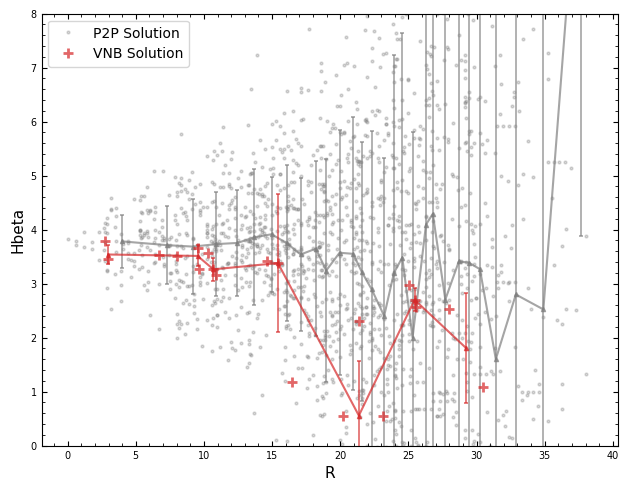

In [57]:
# fig, ax = plt(1, 1, facecolor='white', figsize=(6,4), dpi=300, tight_layout=True)
plt.figsize=(6,4)
gs1 = gridspec.GridSpec(1, 1)
gs1.update(left=0.05, right=.95, bottom=0.05, top=0.95, hspace=0.05)
ax1 = plt.subplot(gs1[0])

ax1.plot(D1['r'], D1['Hbeta'], 'o', c='tab:gray', ms=2, mew=1, alpha=.3, label='P2P Solution', zorder=0)
ax1.plot(D2['r'], D2['Hbeta'], '+', c='tab:red', ms=7, mew=2, alpha=.7, label='VNB Solution')
# ax1.plot(D3['r'], D3['Hbeta'], 'x', c='tab:green', ms=7, mew=2, alpha=.7, label='RDB Solution')

Galaxy_P2P_GP = Data_Grouping(array_x=np.array(D1.sort_values(by=['r'])['r']), array_y=np.array(D1.sort_values(by=['r'])['Hbeta']), group_k=70)
Galaxy_VNB_GP = Data_Grouping(array_x=np.array(D2.sort_values(by=['r'])['r']), array_y=np.array(D2.sort_values(by=['r'])['Hbeta']), group_k=3)
# Galaxy_RDB_GP = Data_Grouping(array_x=np.array(D3.sort_values(by=['r'])['r']), array_y=np.array(D3.sort_values(by=['r'])['Hbeta']), group_k=3)

ax1.errorbar(Galaxy_P2P_GP[0], Galaxy_P2P_GP[1], yerr=Galaxy_P2P_GP[3],color='tab:gray',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7, zorder=1)
ax1.errorbar(Galaxy_VNB_GP[0], Galaxy_VNB_GP[1], yerr=Galaxy_VNB_GP[3],color='tab:red',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7)
# ax1.errorbar(Galaxy_RDB_GP[0], Galaxy_RDB_GP[1], yerr=Galaxy_RDB_GP[3],color='tab:green',fmt='^-',ms=3,elinewidth=1.2,capsize=1.7,capthick=1.2,alpha=.7, zorder=1)

ax1.xaxis.set_minor_locator(AutoMinorLocator(5))
ax1.yaxis.set_minor_locator(AutoMinorLocator(5))
ax1.tick_params(axis='both', which='both', labelsize='x-small', right=True, top=True, direction='in')

ax1.set_ylim(0,8)
# ax1.set_xlim(,)
# ax1.set_yscale('log')
ax1.set_xlabel(r'R', size=11)
ax1.set_ylabel(r'Hbeta', size=11)

ax1.legend()

# plt.savefig('./', format='pdf', bbox_inches='tight')